In [1]:
import sys
import configuration.configuration as cfg
import numpy as np
from measurement.measurement import state_vector
from measurement.arclength import slow
import argparse
import xml.etree.ElementTree as etree
import os
import matplotlib.pyplot as plt

%load_ext autoreload
%autoreload 2
%matplotlib inline

In [2]:
parser = argparse.ArgumentParser(description="Simulate SURE/SAR process")

parser.add_argument("--config-xml", help="The config XML file", 
                    default = u'/home/ishuwa/simulation/40cm/40cm_simulation.xml')
parser.add_argument("--mchan-processed-file",
                    help="The name of the multi-channel processed output file",
                    default = None)
parser.add_argument("--make-plots",
                    help="Generate plots along the way",
                    action="store_true",
                    default=True)
parser.add_argument("--wk-processed-file",
                    help="Temporary file in which to write the W-K data. This is needed for large files",
                    default=None)
vv = parser.parse_args([])

In [3]:
radar = cfg.loadConfiguration(vv.config_xml)

Computing satellite positions for channel 0
Reference time:
2015-01-01T00:00:06.378665072
kappa: 1.341802999e-07 tau: 1.641681580e-08 dkappa: -1.218167841e-17
[0, 1, 2, 3, 4]
[Done]
Computing satellite positions for channel 15
Reference time:
2015-01-01T00:00:06.378665072
kappa: 1.341802999e-07 tau: 1.641681580e-08 dkappa: -1.218167841e-17
[15, 16, 17, 18, 19]
[Done]
Computing satellite positions for channel 10
Reference time:
2015-01-01T00:00:06.378665072
kappa: 1.341802999e-07 tau: 1.641681580e-08 dkappa: -1.218167841e-17
[10, 11, 12, 13, 14]
[Done]
Computing satellite positions for channel 5
Reference time:
2015-01-01T00:00:06.378665072
kappa: 1.341802999e-07 tau: 1.641681580e-08 dkappa: -1.218167841e-17
[5, 6, 7, 8, 9]
[Done]
Computing satellite positions for channel 20
Reference time:
2015-01-01T00:00:06.378665072
kappa: 1.341802999e-07 tau: 1.641681580e-08 dkappa: -1.218167841e-17
[20, 21, 22, 23, 24]
[Done]


In [4]:
if vv.mchan_processed_file is None:
    vv.mchan_processed_file = "_".join(radar[0]['filename'].split("_")[0:-2] + 
                                       ["Xr", "mchanprocessed.npy"])

In [5]:
if vv.wk_processed_file is None:
    vv.wk_processed_file = "_".join(radar[0]['filename'].split("_")[0:-2] + 
                                       ["rX", "wkprocessed.npy"])

In [6]:
rTargetIndex = 400
pointXYZ, satSV, satTime = cfg.computeReferenceGroundPoint(radar, 
                                                      None, 
                                                      rTargetIndex, 
                                                      None) 
satXYZ = satSV[0:3]
satvXvYvZ = satSV[3:] 

Reference radar index: 0
Ground point computed at time:
2015-01-01T00:00:06.378735273


In [7]:
success = cfg.computeSignal(radar, pointXYZ, satXYZ)

Computing file: 40cm_simulation_rx_c0b0.npy
Progress 0.0000 percent


/home/ishuwa/local/src/Python/radar/antenna/pattern.py:123: NumbaWarning: 
Compilation is falling back to object mode WITH looplifting enabled because Function "antennaResponseMultiCPU" failed type inference due to: Use of unsupported NumPy function 'numpy.argwhere' or unsupported use of the function.

File "antenna/pattern.py", line 147:
def antennaResponseMultiCPU(fastTimes,
    <source elided>
        """ enlarge the fastTimes array as necessary """
        firstValidSample = np.argwhere(fastTimes>=targetRangeTime)[0]
        ^

[1] During: typing of get attribute at /home/ishuwa/local/src/Python/radar/antenna/pattern.py (147)

File "antenna/pattern.py", line 147:
def antennaResponseMultiCPU(fastTimes,
    <source elided>
        """ enlarge the fastTimes array as necessary """
        firstValidSample = np.argwhere(fastTimes>=targetRangeTime)[0]
        ^

  @jit(parallel=True)
/home/ishuwa/local/src/Python/radar/antenna/pattern.py:123: NumbaWarning: 
Compilation is falling back to

Progress 9.9916 percent
Progress 19.9833 percent
Progress 29.9749 percent
Progress 39.9666 percent
Progress 49.9582 percent
Progress 59.9498 percent
Progress 69.9415 percent
Progress 79.9331 percent
Progress 89.9247 percent
Progress 99.9164 percent
Computing file: 40cm_simulation_rx_c1b0.npy
Progress 0.0000 percent
Progress 9.9916 percent
Progress 19.9833 percent
Progress 29.9749 percent
Progress 39.9666 percent
Progress 49.9582 percent
Progress 59.9498 percent
Progress 69.9415 percent
Progress 79.9331 percent
Progress 89.9247 percent
Progress 99.9164 percent
Computing file: 40cm_simulation_rx_c2b0.npy
Progress 0.0000 percent
Progress 9.9916 percent
Progress 19.9833 percent
Progress 29.9749 percent
Progress 39.9666 percent
Progress 49.9582 percent
Progress 59.9498 percent
Progress 69.9415 percent
Progress 79.9331 percent
Progress 89.9247 percent
Progress 99.9164 percent
Computing file: 40cm_simulation_rx_c3b0.npy
Progress 0.0000 percent
Progress 9.9916 percent
Progress 19.9833 percent


In [8]:
bands = np.arange(-int(len(radar)/2)-2,int(len(radar)/2)+1+2)

In [9]:
r_sys = cfg.radar_system(radar, bands)

kappa: 1.341802993e-07 tau: 1.641682106e-08 dkappa: -1.218304748e-17


In [10]:
procData, _ = cfg.multiChannelProcess(radar, bands, p=0.1, SNR=10)

Loading the data from disk...
['/home/ishuwa/simulation/40cm/l0_data/40cm_simulation_rx_c0b0.npy', '/home/ishuwa/simulation/40cm/l0_data/40cm_simulation_rx_c1b0.npy', '/home/ishuwa/simulation/40cm/l0_data/40cm_simulation_rx_c2b0.npy', '/home/ishuwa/simulation/40cm/l0_data/40cm_simulation_rx_c3b0.npy', '/home/ishuwa/simulation/40cm/l0_data/40cm_simulation_rx_c4b0.npy', '/home/ishuwa/simulation/40cm/l0_data/40cm_simulation_rx_c0b1.npy', '/home/ishuwa/simulation/40cm/l0_data/40cm_simulation_rx_c1b1.npy', '/home/ishuwa/simulation/40cm/l0_data/40cm_simulation_rx_c2b1.npy', '/home/ishuwa/simulation/40cm/l0_data/40cm_simulation_rx_c3b1.npy', '/home/ishuwa/simulation/40cm/l0_data/40cm_simulation_rx_c4b1.npy', '/home/ishuwa/simulation/40cm/l0_data/40cm_simulation_rx_c0b2.npy', '/home/ishuwa/simulation/40cm/l0_data/40cm_simulation_rx_c1b2.npy', '/home/ishuwa/simulation/40cm/l0_data/40cm_simulation_rx_c2b2.npy', '/home/ishuwa/simulation/40cm/l0_data/40cm_simulation_rx_c3b2.npy', '/home/ishuwa/sim

In [11]:
np.save(vv.mchan_processed_file, procData)

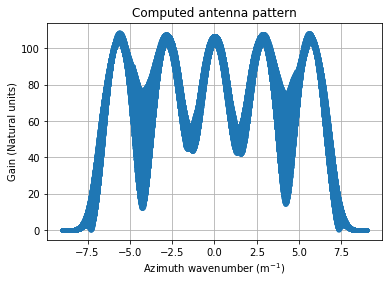

In [12]:
%matplotlib inline
if vv.make_plots:
    plt.figure()
    plt.plot(sorted(r_sys.ks_full), np.abs(np.sum(procData,axis=1))[r_sys.ks_full_idx],'.')
    #plt.plot(sorted(r_sys.ks_full), np.abs(np.sum(procData,axis=1)),'.')
    plt.title("Computed antenna pattern")
    plt.xlabel("Azimuth wavenumber (m$^{-1}$)")
    plt.ylabel("Gain (Natural units)")
    plt.grid()
    plt.show()

In [13]:
procData = np.fft.ifft(procData, axis=0)

In [14]:
if vv.make_plots:
    flatProc = np.sum(procData, axis=1)

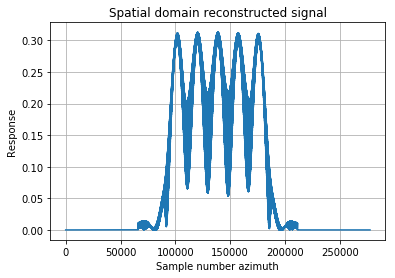

In [15]:
if vv.make_plots:
    plt.figure()
    plt.grid()
    plt.plot(np.abs(flatProc))
    plt.title("Spatial domain reconstructed signal")
    plt.xlabel("Sample number azimuth")
    plt.ylabel("Response")
    plt.show()

Reference radar index: 0
Ground point computed at time:
2015-01-01T00:00:06.378735273


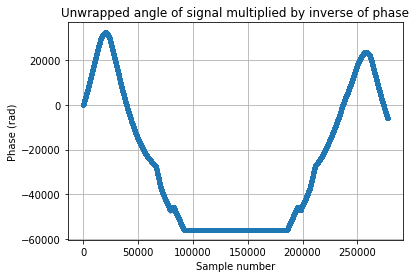

In [16]:
if vv.make_plots:
    # Compute the ground point and associate slow time parameters
    r_sys.computeGroundPoint(radar, range_idx=400)
    
    # Compute the slow time parameter
    s = np.arange(r_sys.Na*r_sys.n_bands)/(r_sys.ksp*r_sys.n_bands)
    s = s - np.mean(s) - 10
    cdf = r_sys.C.cdf
    
    # Compute the range curve
    rngs_curve = np.outer(r_sys.C.R, s**0) + np.outer(cdf[1],s) + np.outer(cdf[2], (s**2)/2.0) + np.outer(cdf[3], (s**3)/6.0)
    rngs = np.sqrt(np.sum(rngs_curve*rngs_curve, axis=0))
    
    # Create the inverse phase function
    rC = np.exp(-1j*r_sys.kr[0]*rngs)
    
    plt.figure()
    plt.plot(np.unwrap(np.angle(flatProc*np.conj(rC))),'.')
    plt.title("Unwrapped angle of signal multiplied by inverse of phase")
    plt.xlabel("Sample number")
    plt.ylabel("Phase (rad)")
    plt.grid()
    plt.show()

In [17]:
del procData

In [18]:
procData = cfg.loadNumpy_mcp_data(vv.mchan_processed_file)

In [19]:
wkSignal = cfg.wkProcessNumba(procData, r_sys, os_factor=16, mem_cols = 8192,
                              tempFile=vv.wk_processed_file)

Processing cols 0 to 8192...
Interpolating the signal...


/home/ishuwa/local/src/Python/radar/omegak/nbomegak.py:45: NumbaWarning: 
Compilation is falling back to object mode WITH looplifting enabled because Function "interpolatePulsesCx" failed type inference due to: Unknown attribute 'fft' of type Module(<module 'numpy.fft' from '/home/ishuwa/anaconda3/envs/ishenv/lib/python3.7/site-packages/numpy/fft/__init__.py'>)

File "omegak/nbomegak.py", line 64:
def interpolatePulsesCx(Y, YY, Xnew, Yos, Yos_idx):
    <source elided>
        Yos *= 0.0
        Yos[Yos_idx] = np.fft.fft(Y[:,col])
        ^

[1] During: typing of get attribute at /home/ishuwa/local/src/Python/radar/omegak/nbomegak.py (64)

File "omegak/nbomegak.py", line 64:
def interpolatePulsesCx(Y, YY, Xnew, Yos, Yos_idx):
    <source elided>
        Yos *= 0.0
        Yos[Yos_idx] = np.fft.fft(Y[:,col])
        ^

  @jit
/home/ishuwa/local/src/Python/radar/omegak/nbomegak.py:45: NumbaWarning: 
Compilation is falling back to object mode WITHOUT looplifting enabled because Function "i

Correcting residual phase and applying IFFT...
Processing cols 8192 to 16384...
Interpolating the signal...
Correcting residual phase and applying IFFT...
Processing cols 16384 to 24576...
Interpolating the signal...
Correcting residual phase and applying IFFT...
Processing cols 24576 to 32768...
Interpolating the signal...
Correcting residual phase and applying IFFT...
Processing cols 32768 to 40960...
Interpolating the signal...
Correcting residual phase and applying IFFT...
Processing cols 40960 to 49152...
Interpolating the signal...
Correcting residual phase and applying IFFT...
Processing cols 49152 to 57344...
Interpolating the signal...
Correcting residual phase and applying IFFT...
Processing cols 57344 to 65536...
Interpolating the signal...
Correcting residual phase and applying IFFT...
Processing cols 65536 to 73728...
Interpolating the signal...
Correcting residual phase and applying IFFT...
Processing cols 73728 to 81920...
Interpolating the signal...
Correcting residual 

In [20]:
if vv.wk_processed_file is not None:
    del procData
    wkSignal = np.fft.ifft(np.load(vv.wk_processed_file), axis=1)
    wkSignal = wkSignal/np.max(np.abs(wkSignal))

In [21]:
mxcol = np.argmax(np.sum(np.abs(wkSignal), axis=0))
mxrow = np.argmax(np.sum(np.abs(wkSignal), axis=1))
print("Maximum for data located at row %d, col %d" % (mxrow, mxcol))

Maximum for data located at row 400, col 138765


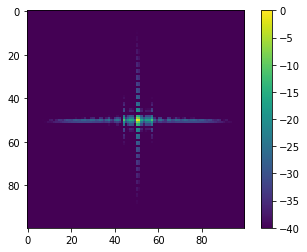

In [22]:
if vv.make_plots:
    DX = 50
    DY = 50
    plt.figure()
    plt.imshow(20.0*np.log10(np.abs(wkSignal[(mxrow-DY):(mxrow+DY), (mxcol-DX):(mxcol+DX)])))
    plt.clim(-40,0)
    plt.colorbar()
    plt.show()

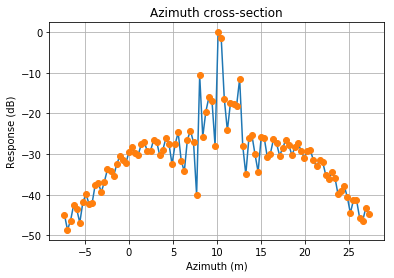

In [23]:
if vv.make_plots:
    rows, cols = wkSignal.shape
    x = (np.arange(cols) - cols/2.0)/(r_sys.n_bands*r_sys.ksp)
    plt.figure()
    dX = 50
    plt.plot(x[(mxcol-dX):(mxcol+dX)], 
             20.0*np.log10(np.abs(wkSignal[mxrow,(mxcol-dX):(mxcol+dX)])), 
             x[(mxcol-dX):(mxcol+dX)], 
             20.0*np.log10(np.abs(wkSignal[mxrow,(mxcol-dX):(mxcol+dX)])), 'o')
    #plt.imshow(np.abs(wkSignal))
    #plt.clim(-100,10)
    plt.title("Azimuth cross-section")
    plt.xlabel('Azimuth (m)')
    plt.ylabel('Response (dB)')
    plt.grid()
    plt.show()

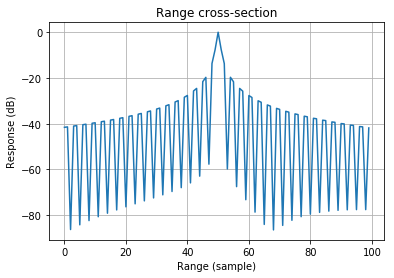

In [24]:
if vv.make_plots:
    plt.figure()
    plt.plot(20.0*np.log10(np.abs(wkSignal[(mxrow-50):(mxrow+50),mxcol])))
    plt.title("Range cross-section")
    plt.xlabel('Range (sample)')
    plt.ylabel('Response (dB)')
    #plt.imshow(np.abs(wkSignal))
    #plt.clim(-100,10)
    plt.grid()
    plt.show()